In [2]:
PATH = r"C:\Users\melissa\Desktop\T Brain"
SAVE = os.path.join(PATH, "processed_csv")
os.chdir(SAVE)

In [3]:
pd.options.display.max_columns = None

In [4]:
day_schedule = pd.read_csv('day_schedule.csv').rename(columns={"0":"group_id"})
group        = pd.read_csv('group.csv')         # V
order        = pd.read_csv('order.csv')         # V
airline      = pd.read_csv('airline.csv').drop(columns="index").rename(columns={"0":"group_id"})
test         = pd.read_csv('testing-set.csv')
train        = pd.read_csv('training-set.csv')
train_len, test_len = len(train), len(test)

C:\Users\melissa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\melissa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (14,15,16,17,18,20,21,22,23,24,26,27,28,29,30,32,33,34,35,36,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# mix train and test
total = pd.concat((train, test))

order_columns = ["order_id","group_id","source_1","source_2","unit","people_amount"]
total = pd.merge(total, order[order_columns], how="left", on="order_id", )

group_columns = ["group_id","sub_line","area","days","price"]
total = pd.merge(total, group[group_columns], how="left", on="group_id", )

airline_columns = ["group_id","isweekend_2","isvacation_2","dest_airport"]
total = pd.merge(total, airline[airline_columns], how="left", on="group_id")

# day_schedule_columns = ["group_id","isweekend_2","isvacation_2","dest_airport"]
# total = pd.merge(total, day_schedule, how="left", on="group_id" )

In [12]:
columns = [     "order_id","group_id",'deal_or_not', 'source_1', 'source_2', 'unit',
                'people_amount', 'sub_line', 'area', 'days', 'price', 'isweekend_2',
                'isvacation_2', 'dest_airport']

In [13]:
_X = total[columns]
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(_X.dest_airport.values.astype(str))
trans = LE.transform(_X.dest_airport.values.astype(str))
_X.dest_airport = trans

# Analysis of unit

In [102]:
_X.unit.unique()

array([  4,   5,   6,  10,  11,  12,  13,  14,   1,  22,  26,  33,  27,
        32,  48,  45,  19,   8,  49,  43,  36,  50,   3,  53,  54,  39,
        55,  16,  47,  30,  60,  61,  46,  62,  29,  67,  66,  69,  44,
        64,  70,  41,  35,  74,  18,  75,  58,  76,  77,  79,  65,  73,
         2,  24,  81,  37,  21,  56,  68,  82,  71,  15,  42,  83,  84,
        85,  31,  87,  52,  78,  88,  17,  86,  89,  90,   9,  91,  92,
        38,  57,  20,  94,   7,  96,  97,  95,  34,  59,  93,  63,  98,
        72,  40,  23,  28,  25,  99,  80, 100, 102, 101, 104, 105,  51,
       103, 106, 108, 111, 109, 112, 114, 115, 107, 117, 113, 116, 119,
       118, 120, 121, 110], dtype=int64)

In [103]:
# unit and deal_or_not
unit_ = _X.groupby("unit")["deal_or_not"]
unit_sum = unit_.sum().values.reshape(-1,1)
unit_count = np.array([len(_X[_X["unit"]==i]) for i in _X.unit.unique()])
unit_count = unit_.count().values.reshape(-1,1)
buffer = np.concatenate((unit_sum, unit_count, unit_sum/unit_count*100), axis=1)
unit_df = pd.DataFrame(buffer, columns=["sum","count","ratio"]).sort_values("ratio", ascending=False)

C:\Users\melissa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [104]:
unit_df.transpose()

,106,76,114,4,99,103,23,37,51,104,102,24,30,65,78,94,2,81,74,9,27,67,35,25,86,43,96,41,16,88,46,26,90,14,92,42,73,56,62,33,0,64,1,28,44,71,79,20,85,75,47,97,83,53,54,10,17,49,77,80,13,7,63,59,66,57,38,58,15,40,89,101,36,18,60,3,70,32,5,29,82,69,93,45,12,8,61,11,84,91,72,87,68,19,31,22,98,21,48,52,55,39,107,6,110,50,113,119,118,117,116,115,95,112,111,34,108,105,100,120,109
sum,246.000000,490.00000,136.000000,74.00000,1263.000000,526.000000,153.00000,142.000000,88.000000,17.000000,14.000000,143.0,181.00000,238.000000,161.000000,92.000000,2133.000000,141.000000,43.000000,221.000000,131.000000,131.000000,169.000000,160.00000,13.000000,143.000000,32.000000,154.000000,178.000000,149.000000,199.000000,249.000000,141.000000,146.000000,142.000000,144.000000,115.000000,118.000000,117.000000,127.000000,2999.000000,200.000000,331.000000,299.000000,253.00000,159.000000,22.000000,222.000000,171.000000,139.000000,183.000000,102.00000,202.000000,225.000000,75.000000,255.000000,140.000000,106.000000,92.000000,153.000000,204.000000,1002.000000,170.00000,116.000000,173.000000,141.000000,1224.000000,127.000000,1757.000000,171.000000,135.000000,13.000000,190.000000,158.000000,295.000000,108.00000,452.00000,194.000000,3621.000000,201.000000,185.000000,10.000000,9.000000,173.000000,203.000000,268.000000,157.000000,163.00000,116.000000,158.000000,110.000000,121.000000,54.000000,95.0,77.000000,119.000000,35.000000,422.000000,263.000000,197.000000,116.000000,109.000000,1.000000,1.000000,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
count,264.000000,530.00000,150.000000,102.00000,2057.000000,932.000000,537.00000,502.000000,319.000000,65.000000,55.000000,572.0,755.00000,1004.000000,681.000000,394.000000,9296.000000,620.000000,190.000000,977.000000,594.000000,599.000000,776.000000,736.00000,60.000000,661.000000,148.000000,720.000000,833.000000,705.000000,952.000000,1197.000000,681.000000,707.000000,691.000000,702.000000,571.000000,586.000000,583.000000,633.000000,14974.000000,1009.000000,1670.000000,1514.000000,1284.00000,809.000000,112.000000,1132.000000,884.000000,720.000000,951.000000,531.00000,1052.000000,1197.000000,399.000000,1357.000000,751.000000,569.000000,494.000000,822.000000,1106.000000,5445.000000,930.00000,636.000000,950.000000,786.000000,6878.000000,717.000000,9924.000000,966.000000,763.000000,74.000000,1082.000000,904.000000,1691.000000,627.00000,2633.00000,1141.000000,21404.000000,1189.000000,1102.000000,60.000000,54.000000,1040.000000,1239.000000,1639.000000,979.000000,1021.00000,732.000000,1004.000000,702.000000,784.000000,351.000000,625.0,522.000000,814.000000,248.000000,3006.000000,1875.000000,1484.000000,886.000000,909.000000,11.000000,14.000000,20.0,70.000000,1.0,1.0,12.0,3.0,4.0,3.0,3.0,5.0,9.0,83.0,3.0,6.0,81.0,1.0,0.0
ratio,93.181818,92.45283,90.666667,72.54902,61.400097,56.437768,28.49162,28.286853,27.586207,26.153846,25.454545,25.0,23.97351,23.705179,23.641703,23.350254,22.945353,22.741935,22.631579,22.620266,22.053872,21.869783,21.778351,21.73913,21.666667,21.633888,21.621622,21.388889,21.368547,21.134752,20.903361,20.802005,20.704846,20.650636,20.549928,20.512821,20.140105,20.136519,20.068611,20.063191,20.028049,19.821606,19.820359,19.749009,19.70405,19.653894,19.642857,19.611307,19.343891,19.305556,19.242902,19.20904,19.201521,18.796992,18.796992,18.791452,18.641811,18.629174,18.623482,18.613139,18.444846,18.402204,18.27957,18.238994,18.210526,17.938931,17.795871,17.712692,17.704555,17.701863,17.693316,17.567568,17.560074,17.477876,17.445299,17.22488,17.16673,17.002629,16.917399,16.904962,16.787659,16.666667,16.666667,16.634615,16.384181,16.351434,16.036772,15.96474,15.846995,15.737052,15.669516,15.433673,15.384615,15.2,14.750958,14.619165,14.112903,14.038589,14.026667,13.274933,13.092551,11.991199,9.090909,7.142857,5.0,1.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


# Analysis of source_1

In [109]:
source1_ = _X.groupby("source_1")["deal_or_not"]
sou_sum = source1_.sum().values.reshape(-1,1)
sou_count = np.array([len(_X[_X["source_1"]==i]) for i in [1,2,3] ]).reshape(-1,1)
# sou_count = source1_.count().values.reshape(-1,1)
sou_ratio = sou_sum / sou_count * 100
buffer = np.concatenate((sou_sum,sou_count, sou_ratio), axis=1)
sou = pd.DataFrame(buffer, columns=["sum", "count", "ratio"], index=[1,2,3]).sort_values(by="ratio", ascending=False)

In [117]:
sou

,sum,count,ratio
3,1220.0,7115.0,17.146873
2,9849.0,87558.0,11.248544
1,18135.0,202347.0,8.962327


In [137]:
use_columns = [ "deal_or_not", 'source_1', 'source_2', 'unit',
                'people_amount', 'sub_line', 'area', 'days', 'price', 'isweekend_2',
                'isvacation_2', 'dest_airport']
features = use_columns[1:]

In [139]:
buffer = _X[use_columns][:train_len]

In [159]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_use = {}
y_use = {}

for i in range(1, 4):
    X_use[i] = buffer.query("source_1=="+str(i))[features].iloc[:,1:].values
    y_use[i] = buffer.query("source_1=="+str(i))["deal_or_not"].values

x_train, x_test, y_train, y_test, x_valid, y_valid= {}, {}, {}, {}, {}, {}
for i in range(1,4):
    x_train[i], x_test[i], y_train[i], y_test[i] = \
      train_test_split(X_use[i], y_use[i], random_state=2018, stratify=y_use[i])
    x_train[i], x_valid[i], y_train[i], y_valid[i] = \
      train_test_split(x_train[i], y_train[i], random_state=2018, stratify=y_train[i])

In [257]:
model = { }
for i in range(1,4):
    print("-- start --")
    model[i] = xgb.XGBClassifier(max_depth=8, n_estimators=150, eta=.15)
    model[i].fit(x_train[i], y_train[i], eval_set=((x_train[i], y_train[i]), (x_valid[i], y_valid[i])), 
                 verbose=25, eval_metric="auc")
    print("-"*10)

-- start --
[0]	validation_0-auc:0.629647	validation_1-auc:0.601311
[25]	validation_0-auc:0.665027	validation_1-auc:0.615076
[50]	validation_0-auc:0.700164	validation_1-auc:0.620073
[75]	validation_0-auc:0.731953	validation_1-auc:0.620873
[100]	validation_0-auc:0.756023	validation_1-auc:0.620573
[125]	validation_0-auc:0.776375	validation_1-auc:0.620576
[149]	validation_0-auc:0.787376	validation_1-auc:0.620509
----------
-- start --
[0]	validation_0-auc:0.740644	validation_1-auc:0.72141
[25]	validation_0-auc:0.796853	validation_1-auc:0.728145
[50]	validation_0-auc:0.820466	validation_1-auc:0.729228
[75]	validation_0-auc:0.843385	validation_1-auc:0.730171
[100]	validation_0-auc:0.857877	validation_1-auc:0.730148
[125]	validation_0-auc:0.864639	validation_1-auc:0.730168
[149]	validation_0-auc:0.872529	validation_1-auc:0.729041
----------
-- start --
[0]	validation_0-auc:0.791965	validation_1-auc:0.599209
[25]	validation_0-auc:0.914035	validation_1-auc:0.648353
[50]	validation_0-auc:0.9464

In [258]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score
pred = {}
for i in range(1,4):
    pred[i] = model[i].predict(x_test[i])
    print( accuracy_score(y_test[i], pred[i])*100 )

C:\Users\melissa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


81.64554415610542


C:\Users\melissa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


84.27264409881062


C:\Users\melissa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


64.17910447761194


In [291]:
import catboost as catb

In [340]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_use = {}
y_use = {}

for i in range(1, 4):
    X_use[i] = buffer.query("source_1=="+str(i))[features].iloc[:,1:]
    y_use[i] = buffer.query("source_1=="+str(i))["deal_or_not"]

x_train, x_test, y_train, y_test, x_valid, y_valid= {}, {}, {}, {}, {}, {}
for i in range(1,4):
    x_train[i], x_test[i], y_train[i], y_test[i] = \
      train_test_split(X_use[i], y_use[i], random_state=2018, stratify=y_use[i])
    x_train[i], x_valid[i], y_train[i], y_valid[i] = \
      train_test_split(x_train[i], y_train[i], random_state=2018, stratify=y_train[i])
    
for i in range(1,4):
    x_train[i] = x_train[i].astype(str).reset_index(drop=True)
    x_test[i] =  x_test[i].astype(str).reset_index(drop=True)
#     y_train[i] = y_train[i].astype(str).reset_index(drop=True)
#     y_test[i] =  y_test[i].astype(str).reset_index(drop=True)
    x_valid[i] = x_valid[i].astype(str).reset_index(drop=True)
#     y_valid[i] = y_valid[i].astype(str).reset_index(drop=True)

In [341]:
cmodel = {}
for i in range(1,4):
    print("-- start --")
    cat_feats = np.where(x_train[i].dtypes != np.float)[0]
    cmodel[i] = catb.CatBoostClassifier(max_depth=8, n_estimators=150, 
                                        eval_metric="AUC")
    cmodel[i].fit(x_train[i], y_train[i], 
                  eval_set=(x_valid[i], y_valid[i]),
                  cat_features = cat_feats,
                  verbose=10)
    print("-"*10)

-- start --
0:	test: 0.5381573	best: 0.5381573 (0)	total: 134ms	remaining: 20s
10:	test: 0.6216889	best: 0.6216889 (10)	total: 3.73s	remaining: 47.2s
20:	test: 0.6256399	best: 0.6269225 (16)	total: 8.93s	remaining: 54.9s
30:	test: 0.6266953	best: 0.6269225 (16)	total: 14.5s	remaining: 55.5s
40:	test: 0.6294490	best: 0.6294490 (40)	total: 20.8s	remaining: 55.4s
50:	test: 0.6266495	best: 0.6302452 (41)	total: 26.4s	remaining: 51.3s
60:	test: 0.6252576	best: 0.6302452 (41)	total: 31.9s	remaining: 46.5s
70:	test: 0.6239746	best: 0.6302452 (41)	total: 37.4s	remaining: 41.6s
80:	test: 0.6238417	best: 0.6302452 (41)	total: 42.7s	remaining: 36.3s
90:	test: 0.6237782	best: 0.6302452 (41)	total: 48.4s	remaining: 31.4s
100:	test: 0.6224700	best: 0.6302452 (41)	total: 54.3s	remaining: 26.4s
110:	test: 0.6229583	best: 0.6302452 (41)	total: 59.7s	remaining: 21s
120:	test: 0.6223310	best: 0.6302452 (41)	total: 1m 5s	remaining: 15.6s
130:	test: 0.6209215	best: 0.6302452 (41)	total: 1m 10s	remaining: 1

In [342]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score
pred = {}
for i in range(1,4):
    pred[i] = cmodel[i].predict(x_test[i])
    print( accuracy_score(y_test[i], pred[i])*100 )

81.74612753973044
84.41903019213174
66.36050516647532


In [343]:
pred_prob = { }
pred_auc  = { }
for i in range(1,4):
    pred_prob[i] = cmodel[i].predict_proba(x_test[i])
    pred_prob[i] = pred_prob[i][:,1]
    fpr, tpr, thresholds = roc_curve(y_test[i], pred_prob[i])
    pred_auc[i] = auc(fpr, tpr)
    print(pred_auc[i])

0.626026779453121
0.7345364226847995
0.6365029253316341


In [260]:
# overall auc
PRED_PROB = np.concatenate([pred_prob[i] for i in range(1,4)])
Y_TEST = np.concatenate([y_test[i] for i in range(1,4)])
fpr, tpr, thresholds = roc_curve(Y_TEST, PRED_PROB)
ans = auc(fpr, tpr)
ans

0.6606218419574708

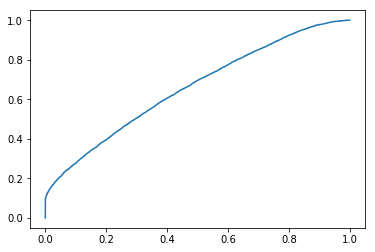

In [185]:
plt.plot(fpr, tpr)
plt.show()

In [ ]:
# save
X_test = _X[use_columns][train_len:].values
pred_test = model.predict_proba(X_test)
pred_test = pred_test[:,1]
test.deal_or_not = pred_test
test.to_csv("my_sub.csv")

# End

In [261]:
# permutation importance
import eli5
from eli5.permutation_importance import get_score_importances

In [262]:
feature_importances = { }
for i in range(1,4):
    print("-- start {} --".format(i))
    # ... load data, define score function
    def score(X, y):
        y_pred = model[i].predict_proba(X)
        y_pred = y_pred[:,1]
        fpr, tpr, thresholds = roc_curve(y, y_pred)
        return auc(fpr, tpr)

    base_score, score_decreases = get_score_importances(score, x_test[i], y_test[i])
    feature_importances[i] = np.mean(score_decreases, axis=0)

-- start 1 --
-- start 2 --
-- start 3 --


In [263]:
list(zip(range(len(features[1:])), features[1:]))

[(0, 'source_2'),
 (1, 'unit'),
 (2, 'people_amount'),
 (3, 'sub_line'),
 (4, 'area'),
 (5, 'days'),
 (6, 'price'),
 (7, 'isweekend_2'),
 (8, 'isvacation_2'),
 (9, 'dest_airport')]

In [264]:
check = {}
for i in range(1,4):
    check[i] = pd.Series(feature_importances[i]).values.reshape(-1,1)
check = np.column_stack([ check[i] for i in range(1,4)])
check = pd.DataFrame(check, 
                     columns=["model_"+str(i) for i in range(1,4)],
                     index=features[1:]).sort_values(by="model_1", ascending=False)

In [272]:
pd.DataFrame( np.column_stack([model[i].feature_importances_.reshape(-1,1) for i in range(1,4)]), 
              index=features[1:], columns=["model_"+str(i) for i in range(1,4)]).\
              sort_values(by="model_1", ascending=False)

,model_1,model_2,model_3
price,0.258044,0.285360,0.249794
unit,0.243067,0.105435,0.220713
dest_airport,0.134504,0.149673,0.150343
area,0.105912,0.096013,0.100000
people_amount,0.101397,0.137869,0.116598
days,0.043640,0.060305,0.049794
sub_line,0.037908,0.041857,0.037586
isweekend_2,0.034110,0.037790,0.028944
isvacation_2,0.031458,0.039476,0.034842
source_2,0.009961,0.046221,0.011385


In [265]:
check

,model_1,model_2,model_3
people_amount,0.042691,0.036869,0.034331
source_2,0.033844,0.038023,0.003769
price,0.026673,0.009581,0.018934
unit,0.022335,0.262997,0.085778
area,0.018290,0.008277,0.006097
days,0.007834,0.009536,0.002677
dest_airport,0.005535,0.007933,-0.004126
sub_line,0.004857,0.004275,-0.000514
isvacation_2,0.001764,0.000888,0.004778
isweekend_2,0.001411,0.000597,-0.002361


In [206]:
check = pd.Series(feature_importances[2]).sort_values(ascending=False)
check

1    0.266960
2    0.026078
0    0.016673
6    0.003521
9    0.003426
4    0.002521
5    0.002171
7    0.000723
8    0.000660
3    0.000151
dtype: float64

In [207]:
check = pd.Series(feature_importances[3]).sort_values(ascending=False)
check

1    0.082343
2    0.033395
4    0.009082
6    0.008948
8    0.000700
0    0.000406
5    0.000379
7    0.000297
3   -0.000868
9   -0.005131
dtype: float64

In [ ]:
# partial dependence

In [ ]:
# load JS visualization code to notebook
shap.initjs()
x_test = x_test.astype(np.float)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

In [ ]:
# visualize the first prediction's explanation
idx=2000
shap.force_plot(explainer.expected_value, shap_values[idx,:], x_test[idx,:], 
                feature_names=used_columns)

In [ ]:
from xgboost import plot_tree

fig = plt.gcf()
fig.set_size_inches(150, 100)
plot_tree(model)

fig.savefig('tree.png')
plt.show()

# End

In [ ]:
import numpy 
from catboost import CatBoostRegressor

dataset = numpy.array([[1,4,5,6],[4,5,6,7],[30,40,50,60],[20,15,85,60]])
train_labels = [1.2,3.4,9.5,24.5]
model = CatBoostRegressor(learning_rate=1, depth=6, loss_function='RMSE')
fit_model = model.fit(dataset, train_labels)

print (fit_model.get_params())

In [ ]:
#!/usr/bin/python
import numpy as np
import xgboost as xgb

### load data in do training
dtrain = xgb.DMatrix('../data/agaricus.txt.train')
dtest = xgb.DMatrix('../data/agaricus.txt.test')
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic'}
watchlist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 3
bst = xgb.train(param, dtrain, num_round, watchlist)

print('start testing prediction from first n trees')
### predict using first 1 tree
label = dtest.get_label()
ypred1 = bst.predict(dtest, ntree_limit=1)
# by default, we predict using all the trees
ypred2 = bst.predict(dtest)
print('error of ypred1=%f' % (np.sum((ypred1 > 0.5) != label) / float(len(label))))
print('error of ypred2=%f' % (np.sum((ypred2 > 0.5) != label) / float(len(label))))